In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture as GMM
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sns
import sklearn.linear_model as lm
from IPython.core.pylabtools import figsize
from IPython.display import display
import math
import warnings
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
import time
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import Lasso,LassoCV
import seaborn as sns

warnings.filterwarnings("ignore")




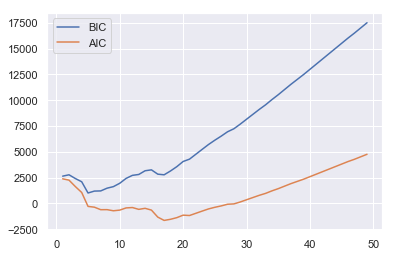

In [103]:
data=pd.read_csv("sony.csv",header=None)
pca = PCA(0.99, whiten=True)
dataDR = pca.fit_transform(data)
n_components = np.arange(1,50,1)
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(dataDR).aic(dataDR) for model in models]
bics = [model.fit(dataDR).bic(dataDR) for model in models]

plt.plot(n_components, bics,label="BIC")
plt.plot(n_components, aics,label="AIC")
plt.legend()
plt.show()




In [3]:
gmm = GMM(17, covariance_type='full', random_state=0)
gmm.fit(dataDR)
print(gmm.converged_)
data_new = gmm.sample(10000)
sonynew = pca.inverse_transform(data_new[0])
df=pd.DataFrame(sonynew)

True


In [4]:
df2=pd.read_csv('lasso_sorted2.csv',header=0,encoding='utf-8')#qc1-9data
df.columns=df2.columns

In [5]:
qc=df.iloc[:,0:9]
stdev=qc.std(axis=1)
stdev=(stdev - stdev.mean()) / stdev.std() #標準化
diff2=(qc-1900)**2
diff2=np.sum(diff2,axis=1)
diff2=np.sqrt(diff2)
diff2=(diff2 - diff2.mean()) / diff2.std() #標準化
st=pd.DataFrame(stdev, columns = ['stdev'])
di2=pd.DataFrame(diff2, columns = ['diff2'])
qcd=pd.concat([st,di2],axis=1)
df["stdevlabel"]=pd.cut(qcd["stdev"],3, labels=['A','B','C'])
df["diff2label"]=pd.cut(qcd["diff2"],3, labels=['a','b','c'])
df["9classlabel"]=df["stdevlabel"].astype('object')+df["diff2label"].astype('object')
df.groupby("9classlabel").count()  

,QC1,QC2,QC3,QC4,QC5,QC6,QC7,QC8,QC9,EQC1_max,...,EQC17_avg,EQC17_stdev,EQC17_range,EQC18_max,EQC18_min,EQC18_avg,EQC18_stdev,EQC18_range,stdevlabel,diff2label
9classlabel,,,,,,,,,,,,,,,,,,,,,
Aa,5821,5821,5821,5821,5821,5821,5821,5821,5821,5821,...,5821,5821,5821,5821,5821,5821,5821,5821,5821,5821
Ab,239,239,239,239,239,239,239,239,239,239,...,239,239,239,239,239,239,239,239,239,239
Ac,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Ba,3258,3258,3258,3258,3258,3258,3258,3258,3258,3258,...,3258,3258,3258,3258,3258,3258,3258,3258,3258,3258
Bb,580,580,580,580,580,580,580,580,580,580,...,580,580,580,580,580,580,580,580,580,580
Bc,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
Ca,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
Cb,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
Cc,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [6]:
eqc=df.iloc[:,9:99]
sc = StandardScaler()
eqc_scaled=pd.DataFrame(sc.fit_transform(eqc))

<h2 style="color:green">ヒストグラムと箱ひげ図<h2>
①全部は正規分布に従う ②平均、標準偏差はそれぞれ

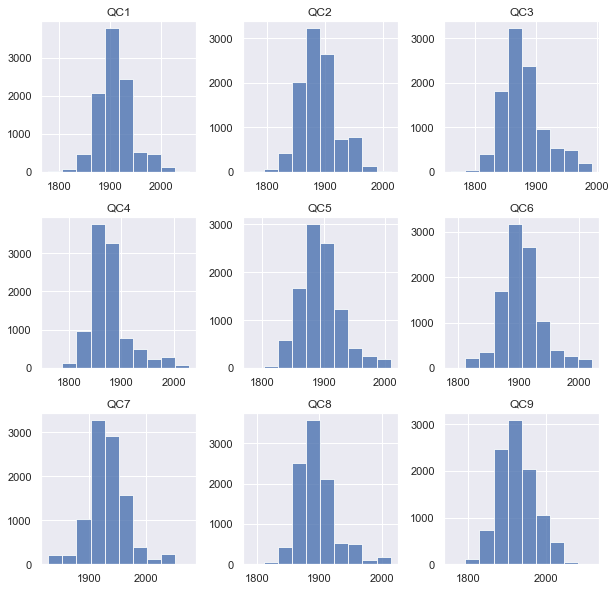

In [7]:
sns.set(color_codes=True)
qc.hist(alpha=0.8,figsize=(10,10))
plt.show()


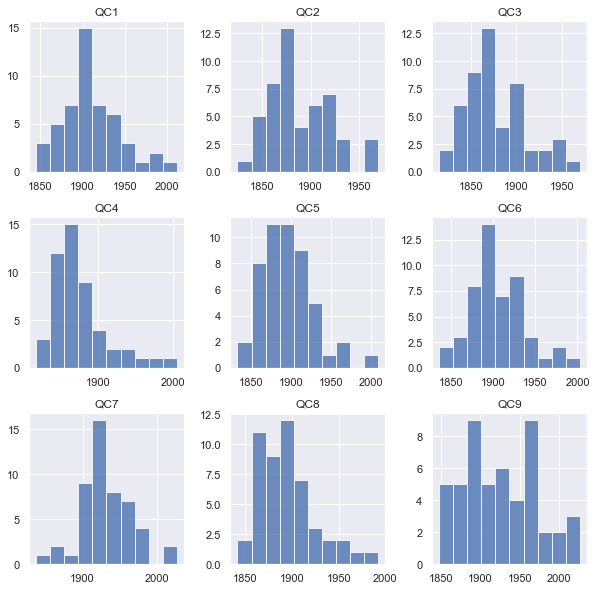

In [8]:
                                                                                                                                    data.columns=df2.columns
                                                                                                                                    oriqc=data.iloc[:,0:9]
                                                                                                                                    oriqc.hist(alpha=0.8,figsize=(10,10))
                                                                                                                                    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214569A8F98>,
      dtype=object)

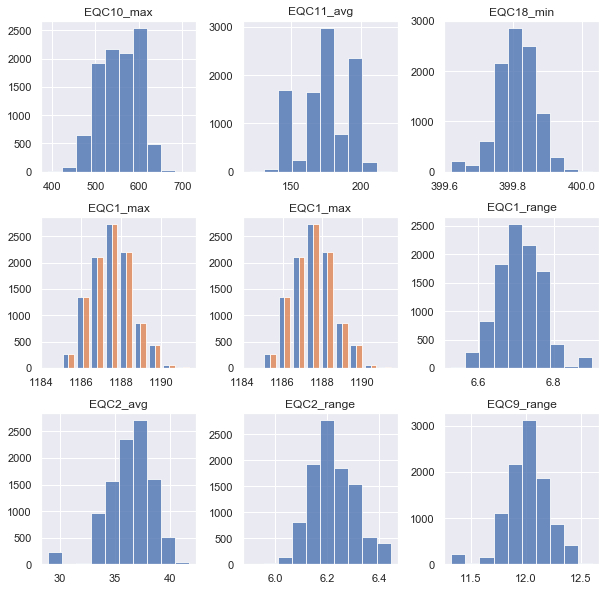

In [9]:
list=np.random.randint(90,size=9)
list
eqc=df.iloc[:,9:99]
eqcs=eqc.iloc[:,list]
eqcs.hist(alpha=0.8,figsize=(10,10))


orieqc=data.iloc[:,9:99]

orieqcs.hist(alpha=0.8,figsize=(10,10))
plt.show()

In [10]:
list

array([ 0,  7, 52,  0,  9, 86, 44,  4, 45])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021453FB4160>,
      dtype=object)

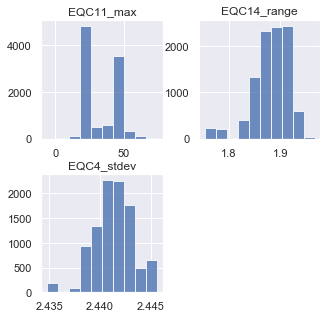

In [11]:
data2=df.iloc[:,[27,59,78]]
data2.hist(alpha=0.8,figsize=(5,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214541544A8>,
      dtype=object)

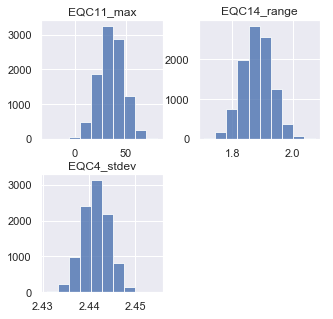

In [12]:
data3=df2.iloc[:,[27,59,78]]
data3.hist(alpha=0.8,figsize=(5,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214568B8E80>,
      dtype=object)

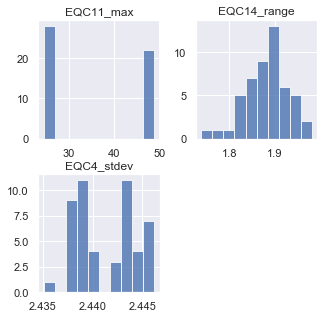

In [13]:
data1=data.iloc[:,[27,59,78]]
data1.hist(alpha=0.8,figsize=(5,5))

In [72]:
eqchikaku=pd.concat([data1,data3,data2],axis=1)
eqchikaku1=pd.DataFrame(sc.fit_transform(eqchikaku))
eqchikaku1.columns=["original EQC4std","original EQC11max","original EQC14range","MND EQC4std","MND EQC11max","MND EQC14range","GMM EQC4std","GMM EQC11max","GMM EQC14range"]
data11=pd.DataFrame(sc.fit_transform(data1))
data11.columns=["original EQC4std","original EQC11max","original EQC14range"]
eqchikaku11=eqchikaku1.iloc[:,3:9]

In [15]:
from sklearn.svm import LinearSVC
clf_lin= LinearSVC()
clf_rbf=SVC(kernel='rbf')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021456807518>,
      dtype=object)

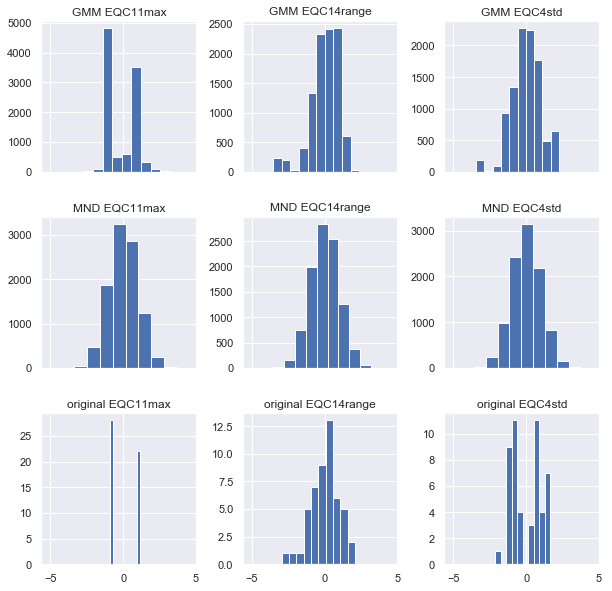

In [16]:
eqchikaku1.hist(sharex=True,figsize=(10,10))

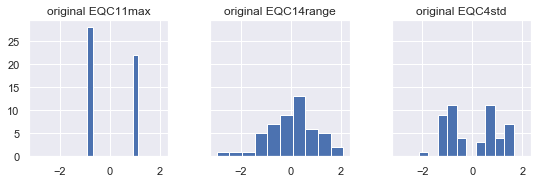

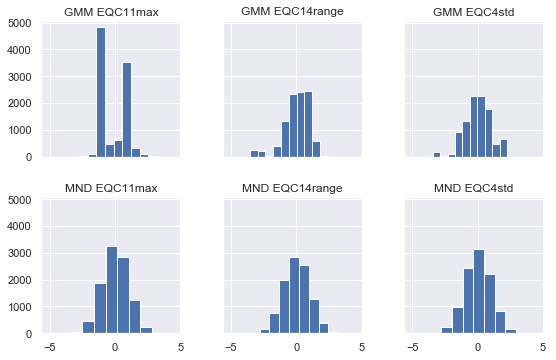

In [94]:
ax1=data11.hist(layout=(3,3),sharex=True,sharey=True,figsize=(9,9))
ax2=eqchikaku11.hist(layout=(3,3),sharey=True,sharex=True,figsize=(9,9))


(array([28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 22.]),
 array([-0.88640526, -0.68494952, -0.48349378, -0.28203804, -0.0805823 ,
         0.12087344,  0.32232919,  0.52378493,  0.72524067,  0.92669641,
         1.12815215]),
 <a list of 10 Patch objects>)

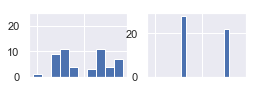

In [64]:

ax1 = plt.subplot(331)
plt.hist(data11["original EQC4std"])
plt.axis([-4, 4, 0, 25])
plt.setp(plt.gca(), xticklabels=[], xticks=(-2, 0, 2), yticks=(0, 10, 20))

ax2=plt.subplot(332,sharex=ax1)
plt.hist(data11["original EQC11max"])



# lasso +svm 
50

In [78]:
row=np.random.randint(10000,size=50)
y1=stdev[row]
y2=diff2[row]
x=eqc_scaled.iloc[row,:]

from sklearn.linear_model import Lasso,LassoCV

lassocv1 = LassoCV(cv=10).fit(x,y1)

alpha1 = lassocv1.alpha_
print('最適alpha：' + str(alpha1))

coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef1 != 0)) + " variables and eliminated the other " +  str(sum(coef1 == 0)) + " variables")


lassocv2 = LassoCV(cv=10).fit(x,y2)
alpha2 = lassocv2.alpha_
print('最適alpha：' + str(alpha2))

coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef2 != 0)) + " variables and eliminated the other " +  str(sum(coef2 == 0)) + " variables")

pc1_index= np.where(coef1 != 0)
pc2_index= np.where(coef2 != 0)
index=np.union1d(pc1_index,pc2_index)
print(index.shape)


y=df.iloc[row,101]
svm_x=eqc_scaled.iloc[row,index]
start = time.clock()

scores = cross_val_score(clf_rbf,svm_x, y,cv=10,scoring='accuracy')
print(scores)
print("RBF Accuracy: %0.2f (+/- %0.3f)" % (scores.mean(), scores.std() ))
end = time.clock()
print("計算時間:",end-start)

start = time.clock()

scores = cross_val_score(clf_lin,svm_x, y, cv=10,scoring='accuracy')
print(scores)
print("Lin Accuracy: %0.2f (+/- %0.3f)" % (scores.mean(), scores.std() ))
end = time.clock()
print("計算時間:",end-start)

最適alpha：0.07419804329073912
Lasso picked 10 variables and eliminated the other 80 variables
最適alpha：0.22602959302736692
Lasso picked 5 variables and eliminated the other 85 variables
(14,)
[0.75       0.85714286 0.83333333 0.83333333 0.8        0.75
 0.5        0.75       1.         1.        ]
RBF Accuracy: 0.81 (+/- 0.135)
計算時間: 0.025154377771286818
[0.625      0.71428571 0.66666667 1.         0.8        0.75
 0.5        0.75       0.66666667 0.66666667]
Lin Accuracy: 0.71 (+/- 0.123)
計算時間: 0.04867234635321438


In [106]:
from sklearn.svm import LinearSVC
clf_lin= LinearSVC()
clf_rbf=SVC(kernel='rbf')

row50=np.random.randint(10000,size=50)
y1=stdev[row50]
y2=diff2[row50]
x50=eqc_scaled.iloc[row50,:]

from sklearn.linear_model import Lasso,LassoCV

lassocv1 = LassoCV(cv=10).fit(x50,y1)

alpha1 = lassocv1.alpha_
print('最適alpha：' + str(alpha1))

coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef1 != 0)) + " variables and eliminated the other " +  str(sum(coef1 == 0)) + " variables")


lassocv2 = LassoCV(cv=10).fit(x50,y2)
alpha2 = lassocv2.alpha_
print('最適alpha：' + str(alpha2))

coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef2 != 0)) + " variables and eliminated the other " +  str(sum(coef2 == 0)) + " variables")

pc1_index= np.where(coef1 != 0)
pc2_index= np.where(coef2 != 0)
index=np.union1d(pc1_index,pc2_index)
print(index.shape)




最適alpha：0.07739210519146654
Lasso picked 11 variables and eliminated the other 79 variables
最適alpha：0.13626157364399544
Lasso picked 7 variables and eliminated the other 83 variables
(18,)


In [117]:
row=np.random.randint(10000,size=100)
y1=stdev[row]
y2=diff2[row]
x=eqc_scaled.iloc[row,:]

from sklearn.linear_model import Lasso,LassoCV

lassocv1 = LassoCV(cv=10).fit(x,y1)

alpha1 = lassocv1.alpha_
print('最適alpha：' + str(alpha1))

coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef1 != 0)) + " variables and eliminated the other " +  str(sum(coef1 == 0)) + " variables")


lassocv2 = LassoCV(cv=10).fit(x,y2)
alpha2 = lassocv2.alpha_
print('最適alpha：' + str(alpha2))

coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef2 != 0)) + " variables and eliminated the other " +  str(sum(coef2 == 0)) + " variables")

pc1_index= np.where(coef1 != 0)
pc2_index= np.where(coef2 != 0)
index=np.union1d(pc1_index,pc2_index)
print(index.shape)


最適alpha：0.01870368940937623
Lasso picked 14 variables and eliminated the other 76 variables
最適alpha：0.05514776907153016
Lasso picked 11 variables and eliminated the other 79 variables
(22,)


In [128]:
row=np.random.randint(10000,size=300)
y1=stdev[row]
y2=diff2[row]
x=eqc_scaled.iloc[row,:]

from sklearn.linear_model import Lasso,LassoCV

lassocv1 = LassoCV(cv=10).fit(x,y1)

alpha1 = lassocv1.alpha_
print('最適alpha：' + str(alpha1))

coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef1 != 0)) + " variables and eliminated the other " +  str(sum(coef1 == 0)) + " variables")


lassocv2 = LassoCV(cv=10).fit(x,y2)
alpha2 = lassocv2.alpha_
print('最適alpha：' + str(alpha2))

coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef2 != 0)) + " variables and eliminated the other " +  str(sum(coef2 == 0)) + " variables")

pc1_index= np.where(coef1 != 0)
pc2_index= np.where(coef2 != 0)
index=np.union1d(pc1_index,pc2_index)
print(index.shape)



最適alpha：0.005898558518130693
Lasso picked 14 variables and eliminated the other 76 variables
最適alpha：0.0003748261727488586
Lasso picked 26 variables and eliminated the other 64 variables
(30,)


In [139]:
row=np.random.randint(10000,size=500)
y1=stdev[row]
y2=diff2[row]
x=eqc_scaled.iloc[row,:]

from sklearn.linear_model import Lasso,LassoCV

lassocv1 = LassoCV(cv=10).fit(x,y1)

alpha1 = lassocv1.alpha_
print('最適alpha：' + str(alpha1))

coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef1 != 0)) + " variables and eliminated the other " +  str(sum(coef1 == 0)) + " variables")


lassocv2 = LassoCV(cv=10).fit(x,y2)
alpha2 = lassocv2.alpha_
print('最適alpha：' + str(alpha2))

coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef2 != 0)) + " variables and eliminated the other " +  str(sum(coef2 == 0)) + " variables")

pc1_index= np.where(coef1 != 0)
pc2_index= np.where(coef2 != 0)
index=np.union1d(pc1_index,pc2_index)
print(index.shape)



最適alpha：0.005509332240794952
Lasso picked 16 variables and eliminated the other 74 variables
最適alpha：0.0003420887406951608
Lasso picked 25 variables and eliminated the other 65 variables
(35,)


In [151]:
row=np.random.randint(10000,size=1000)
y1=stdev[row]
y2=diff2[row]
x=eqc_scaled.iloc[row,:]

from sklearn.linear_model import Lasso,LassoCV

lassocv1 = LassoCV(cv=10).fit(x,y1)

alpha1 = lassocv1.alpha_
print('最適alpha：' + str(alpha1))

coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef1 != 0)) + " variables and eliminated the other " +  str(sum(coef1 == 0)) + " variables")


lassocv2 = LassoCV(cv=10).fit(x,y2)
alpha2 = lassocv2.alpha_
print('最適alpha：' + str(alpha2))

coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef2 != 0)) + " variables and eliminated the other " +  str(sum(coef2 == 0)) + " variables")

pc1_index= np.where(coef1 != 0)
pc2_index= np.where(coef2 != 0)
index=np.union1d(pc1_index,pc2_index)
print(index.shape)



最適alpha：0.0067827212449105825
Lasso picked 15 variables and eliminated the other 75 variables
最適alpha：0.00028971831720407177
Lasso picked 25 variables and eliminated the other 65 variables
(31,)


In [224]:
row=np.random.randint(10000,size=200)
y1=stdev[row]
y2=diff2[row]
x=eqc_scaled.iloc[row,:]

from sklearn.linear_model import Lasso,LassoCV

lassocv1 = LassoCV(cv=10).fit(x,y1)

alpha1 = lassocv1.alpha_
print('最適alpha：' + str(alpha1))

coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef1 != 0)) + " variables and eliminated the other " +  str(sum(coef1 == 0)) + " variables")


lassocv2 = LassoCV(cv=10).fit(x,y2)
alpha2 = lassocv2.alpha_
print('最適alpha：' + str(alpha2))

coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef2 != 0)) + " variables and eliminated the other " +  str(sum(coef2 == 0)) + " variables")

pc1_index= np.where(coef1 != 0)
pc2_index= np.where(coef2 != 0)
index=np.union1d(pc1_index,pc2_index)
print(index.shape)

最適alpha：0.022912339182304915
Lasso picked 14 variables and eliminated the other 76 variables
最適alpha：0.05056372504372461
Lasso picked 11 variables and eliminated the other 79 variables
(23,)


In [202]:
row=np.random.randint(10000,size=10000)
y1=stdev[row]
y2=diff2[row]
x=eqc_scaled.iloc[row,:]

from sklearn.linear_model import Lasso,LassoCV

lassocv1 = LassoCV(cv=10).fit(x,y1)

alpha1 = lassocv1.alpha_
print('最適alpha：' + str(alpha1))

coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef1 != 0)) + " variables and eliminated the other " +  str(sum(coef1 == 0)) + " variables")


lassocv2 = LassoCV(cv=10).fit(x,y2)
alpha2 = lassocv2.alpha_
print('最適alpha：' + str(alpha2))

coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef2 != 0)) + " variables and eliminated the other " +  str(sum(coef2 == 0)) + " variables")

pc1_index= np.where(coef1 != 0)
pc2_index= np.where(coef2 != 0)
index=np.union1d(pc1_index,pc2_index)
print(index.shape)



最適alpha：0.0005485935776010498
Lasso picked 20 variables and eliminated the other 70 variables
最適alpha：0.00028780829064805566
Lasso picked 25 variables and eliminated the other 65 variables
(37,)


In [93]:
y1=stdev
y2=diff2
x=eqc_scaled

from sklearn.linear_model import Lasso,LassoCV

lassocv1 = LassoCV(cv=10).fit(x,y1)

alpha1 = lassocv1.alpha_
print('最適alpha：' + str(alpha1))

coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef1 != 0)) + " variables and eliminated the other " +  str(sum(coef1 == 0)) + " variables")


lassocv2 = LassoCV(cv=10).fit(x,y2)
alpha2 = lassocv2.alpha_
print('最適alpha：' + str(alpha2))

coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef2 != 0)) + " variables and eliminated the other " +  str(sum(coef2 == 0)) + " variables")

pc1_index= np.where(coef1 != 0)
pc2_index= np.where(coef2 != 0)
index=np.union1d(pc1_index,pc2_index)
print(index.shape)


y=df.iloc[:,101]
svm_x=eqc_scaled.iloc[:,index]
start = time.clock()

scores = cross_val_score(clf_rbf,svm_x, y,cv=10,scoring='accuracy')
print(scores)
print("RBF Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
end = time.clock()
print("計算時間:",end-start)

start = time.clock()

scores = cross_val_score(clf_lin,svm_x, y, cv=10,scoring='accuracy')
print(scores)
print("Lin Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
end = time.clock()
print("計算時間:",end-start)

最適alpha：0.12777589506370962
Lasso picked 9 variables and eliminated the other 81 variables
最適alpha：0.2677919566246135
Lasso picked 1 variables and eliminated the other 89 variables
(10,)
[0.72537313 0.92714571 0.77122877 0.756      0.95       0.54054054
 0.95795796 0.76576577 0.91482966 0.72417252]
RBF Accuracy: 0.80 (+/- 0.25)
計算時間: 4.615881734548793
[0.90149254 0.85329341 0.58941059 0.627      0.78       0.54654655
 0.6986987  0.6996997  0.59619238 0.70411234]
Lin Accuracy: 0.70 (+/- 0.22)
計算時間: 14.184570018327577


In [94]:
row=np.random.randint(10000,size=8000)
y1=stdev[row]
y2=diff2[row]
x=eqc_scaled.iloc[row,:]

from sklearn.linear_model import Lasso,LassoCV

lassocv1 = LassoCV(cv=10).fit(x,y1)

alpha1 = lassocv1.alpha_
print('最適alpha：' + str(alpha1))

coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef1 != 0)) + " variables and eliminated the other " +  str(sum(coef1 == 0)) + " variables")


lassocv2 = LassoCV(cv=10).fit(x,y2)
alpha2 = lassocv2.alpha_
print('最適alpha：' + str(alpha2))

coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef2 != 0)) + " variables and eliminated the other " +  str(sum(coef2 == 0)) + " variables")

pc1_index= np.where(coef1 != 0)
pc2_index= np.where(coef2 != 0)
index=np.union1d(pc1_index,pc2_index)
print(index.shape)


y=df.iloc[row,101]
svm_x=eqc_scaled.iloc[row,index]
start = time.clock()

scores = cross_val_score(clf_rbf,svm_x, y,cv=10,scoring='accuracy')
print(scores)
print("RBF Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
end = time.clock()
print("計算時間:",end-start)

start = time.clock()

scores = cross_val_score(clf_lin,svm_x, y, cv=10,scoring='accuracy')
print(scores)
print("Lin Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
end = time.clock()
print("計算時間:",end-start)

最適alpha：0.0005534772842111792
Lasso picked 20 variables and eliminated the other 70 variables
最適alpha：0.00028909867161428096
Lasso picked 26 variables and eliminated the other 64 variables
(38,)
[0.9552795  0.9501868  0.94763092 0.95380774 0.96375    0.96245307
 0.94993742 0.96110414 0.96737767 0.95734003]
RBF Accuracy: 0.96 (+/- 0.01)
計算時間: 5.843769919777287
[0.85217391 0.83561644 0.85162095 0.84893883 0.85625    0.85231539
 0.8485607  0.8531995  0.86700125 0.86072773]
Lin Accuracy: 0.85 (+/- 0.02)
計算時間: 21.97242132419865


In [95]:
row=np.random.randint(10000,size=9000)
y1=stdev[row]
y2=diff2[row]
x=eqc_scaled.iloc[row,:]

from sklearn.linear_model import Lasso,LassoCV

lassocv1 = LassoCV(cv=10).fit(x,y1)

alpha1 = lassocv1.alpha_
print('最適alpha：' + str(alpha1))

coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef1 != 0)) + " variables and eliminated the other " +  str(sum(coef1 == 0)) + " variables")


lassocv2 = LassoCV(cv=10).fit(x,y2)
alpha2 = lassocv2.alpha_
print('最適alpha：' + str(alpha2))

coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef2 != 0)) + " variables and eliminated the other " +  str(sum(coef2 == 0)) + " variables")

pc1_index= np.where(coef1 != 0)
pc2_index= np.where(coef2 != 0)
index=np.union1d(pc1_index,pc2_index)
print(index.shape)


y=df.iloc[row,101]
svm_x=eqc_scaled.iloc[row,index]
start = time.clock()

scores = cross_val_score(clf_rbf,svm_x, y,cv=10,scoring='accuracy')
print(scores)
print("RBF Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
end = time.clock()
print("計算時間:",end-start)

start = time.clock()

scores = cross_val_score(clf_lin,svm_x, y, cv=10,scoring='accuracy')
print(scores)
print("Lin Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
end = time.clock()
print("計算時間:",end-start)

最適alpha：0.0005397142549228478
Lasso picked 20 variables and eliminated the other 70 variables
最適alpha：0.0002855159281828904
Lasso picked 28 variables and eliminated the other 62 variables
(39,)
[0.95681063 0.95343681 0.95676275 0.96777778 0.96111111 0.96333333
 0.96329255 0.96436526 0.95100223 0.95768374]
RBF Accuracy: 0.96 (+/- 0.01)
計算時間: 6.786274244985179
[0.8648948  0.845898   0.85033259 0.84777778 0.84666667 0.84666667
 0.84760845 0.844098   0.85634744 0.85077951]
Lin Accuracy: 0.85 (+/- 0.01)
計算時間: 22.983915967933854


In [96]:
row=np.random.randint(10000,size=10000)
y1=stdev[row]
y2=diff2[row]
x=eqc_scaled.iloc[row,:]

from sklearn.linear_model import Lasso,LassoCV

lassocv1 = LassoCV(cv=10).fit(x,y1)

alpha1 = lassocv1.alpha_
print('最適alpha：' + str(alpha1))

coef1 = pd.Series(lassocv1.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef1 != 0)) + " variables and eliminated the other " +  str(sum(coef1 == 0)) + " variables")


lassocv2 = LassoCV(cv=10).fit(x,y2)
alpha2 = lassocv2.alpha_
print('最適alpha：' + str(alpha2))

coef2 = pd.Series(lassocv2.coef_)# .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef2 != 0)) + " variables and eliminated the other " +  str(sum(coef2 == 0)) + " variables")

pc1_index= np.where(coef1 != 0)
pc2_index= np.where(coef2 != 0)
index=np.union1d(pc1_index,pc2_index)
print(index.shape)


y=df.iloc[row,101]
svm_x=eqc_scaled.iloc[row,index]
start = time.clock()

scores = cross_val_score(clf_rbf,svm_x, y,cv=10,scoring='accuracy')
print(scores)
print("RBF Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
end = time.clock()
print("計算時間:",end-start)

start = time.clock()

scores = cross_val_score(clf_lin,svm_x, y, cv=10,scoring='accuracy')
print(scores)
print("Lin Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
end = time.clock()
print("計算時間:",end-start)

最適alpha：0.0005451226828740418
Lasso picked 20 variables and eliminated the other 70 variables
最適alpha：0.00027086070944060825
Lasso picked 24 variables and eliminated the other 66 variables
(36,)
[0.96119403 0.96115538 0.96311067 0.96011964 0.95604396 0.96896897
 0.95887663 0.96184739 0.96987952 0.97088353]
RBF Accuracy: 0.96 (+/- 0.01)
計算時間: 8.289057359654862
[0.85472637 0.8376494  0.84945165 0.84247258 0.85614386 0.84384384
 0.85055165 0.84036145 0.83333333 0.84337349]
Lin Accuracy: 0.85 (+/- 0.01)
計算時間: 26.565175184966165
